<a href="https://colab.research.google.com/github/AlirezaAhadipour/Crime-Statistics/blob/main/Crime_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Statistics Case Study

In [ ]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data Set

Here is the link to the dataset:
https://drive.google.com/file/d/1FXsb1gbbDa-Dzw0I3z01DTRQ_DN3EwsZ/view?usp=share_link

In [ ]:
# load the dataset into a dataframe

crime_df = pd.read_csv('Crime_Statistics.csv')
crime_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763


In [ ]:
# size of the dataset

crime_df.shape

(530652, 10)

In [ ]:
crime_df.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,Latitude,Longitude
count,530652.000000,530652.000000,530652.000000,476290.000000,476290.000000,530652.000000,530652.000000
mean,2009.197956,6.450597,15.408590,13.711254,16.940039,44.216029,-110.495297
std,4.386272,3.399212,8.750642,6.767744,18.418950,14.938004,37.329862
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-124.549757
25%,2005.000000,4.000000,8.000000,9.000000,0.000000,49.235573,-123.127194
50%,2009.000000,6.000000,15.000000,15.000000,10.000000,49.264251,-123.107128
75%,2013.000000,9.000000,23.000000,19.000000,30.000000,49.280441,-123.065932
max,2017.000000,12.000000,31.000000,23.000000,59.000000,49.755314,0.000000


# Exploratory Data Analysis (EDA)

### Crime Types

In [ ]:
# number of occurrences for each type of crime

type_crime_counts = crime_df['TYPE'].value_counts()
type_crime_counts

Theft from Vehicle                                        172700
Mischief                                                   70413
Break and Enter Residential/Other                          60862
Offence Against a Person                                   54142
Other Theft                                                52167
Theft of Vehicle                                           38418
Break and Enter Commercial                                 33845
Theft of Bicycle                                           25730
Vehicle Collision or Pedestrian Struck (with Injury)       21901
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Homicide                                                     220
Name: TYPE, dtype: int64

So, there are 11 distinct types of crimes in the dataset. Now lets visualize it:

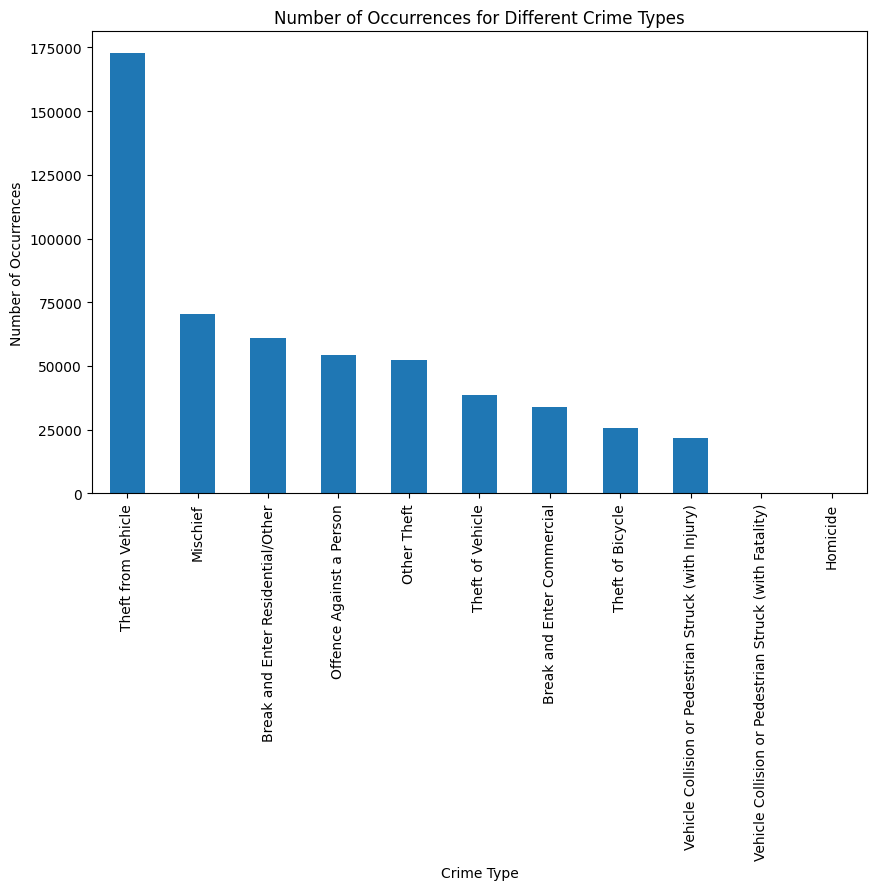

In [ ]:
# bar-plot of different types of crimes
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the bar chart
type_crime_counts.plot(kind='bar')

plt.xlabel('Crime Type')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('Number of Occurrences for Different Crime Types')  # Set the title
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.show()  # Show the plot

So, the most common crime is car theft!

### Year

Now, let's see the pattern of crimes in years.

In [ ]:
# number of occurrences of crime for each year

year_crime_counts = crime_df['YEAR'].value_counts().sort_index()
year_crime_counts

2003    49928
2004    49279
2005    44664
2006    42322
2007    37692
2008    35414
2009    32172
2010    29688
2011    28573
2012    29222
2013    29056
2014    32659
2015    34328
2016    37798
2017    17857
Name: YEAR, dtype: int64

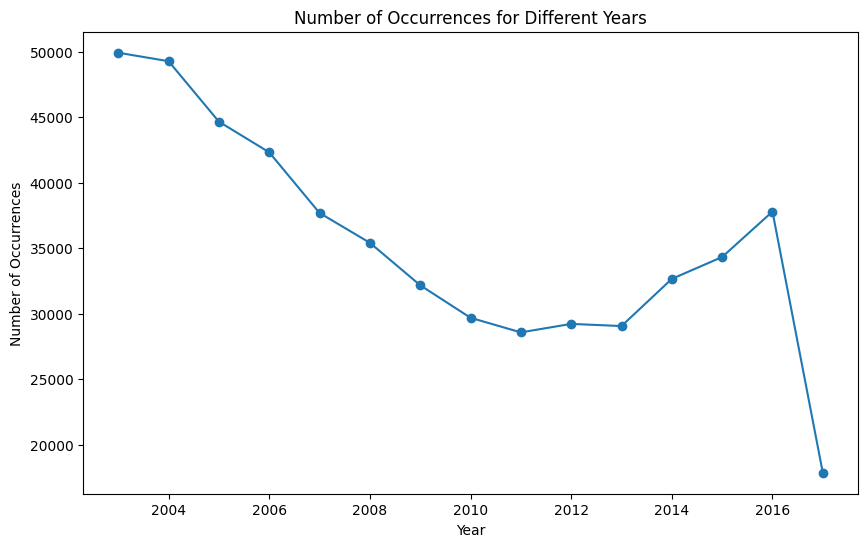

In [ ]:
# Plot the crime occurrences
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line chart
year_crime_counts.plot(kind='line', marker='o')

plt.xlabel('Year')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('Number of Occurrences for Different Years')  # Set the title

plt.show()  # Show the plot

There is an abrupt decrease in crime from 2016 to 2017, which is strange. So let's dive deep to see the reason behind that.

In [ ]:
# Filter the DataFrame for year 2017
crime_2017 = crime_df[crime_df['YEAR'] == 2017]

# Get the unique months in the filtered DataFrame
unique_months_2017 = crime_2017['MONTH'].unique()
unique_months_2017

array([5, 4, 3, 6, 1, 7, 2])

As we can see, not all months are here in 2017 (only from Jan to July) which may mean that the data collection process slowed down and finnaly terminated in 2017!

In [ ]:
crime_counts = crime_2017['MONTH'].value_counts().sort_index()
crime_counts

1    2469
2    2381
3    2999
4    2861
5    3007
6    2891
7    1249
Name: MONTH, dtype: int64

Now let's plot the crime rate in 2016 and 2017 side-to-side to see the gap.

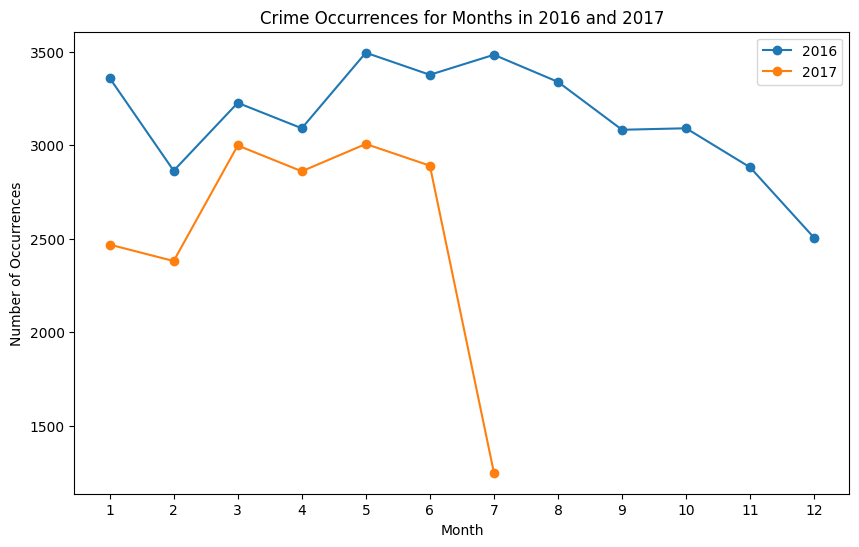

In [ ]:
crime_2016 = crime_df[crime_df['YEAR'] == 2016]
crime_2017 = crime_df[crime_df['YEAR'] == 2017]

# Group the data by month and count the occurrences for each year
crime_counts_2016 = crime_2016['MONTH'].value_counts().sort_index()
crime_counts_2017 = crime_2017['MONTH'].value_counts().sort_index()

# Plot the crime occurrences
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line chart for 2016
plt.plot(crime_counts_2016.index, crime_counts_2016, label='2016', marker='o')

# Plot the line chart for 2017
plt.plot(crime_counts_2017.index, crime_counts_2017, label='2017', marker='o')

plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('Crime Occurrences for Months in 2016 and 2017')  # Set the title

plt.xticks(range(1, 13))  # Set the x-axis ticks for all months

plt.legend()  # Show the legend

plt.show()  # Show the plot

Now let's examine the trend of crimes over the  of crimes over years to see which ones are increasing and which ones are decreasing.

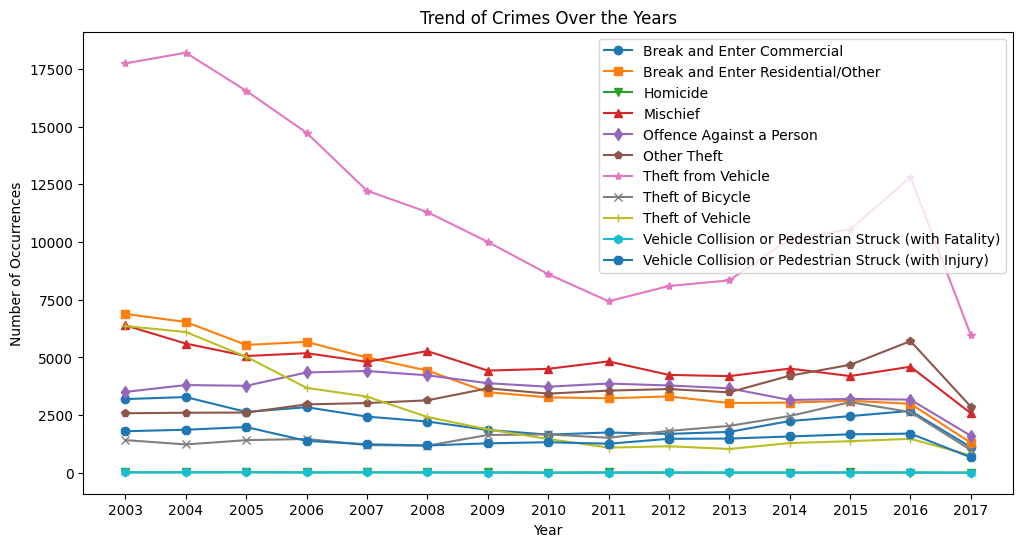

In [ ]:
# Group the data by year and type and count the occurrences
crime_counts = crime_df.groupby(['YEAR', 'TYPE']).size().unstack()

# Plot the trend of different types of crimes over the years
plt.figure(figsize=(12, 6))  # Set the figure size

# Define a list of markers for each crime type
markers = ['o', 's', 'v', '^', 'd', 'p', '*', 'x', '+', 'h', '8']

# Plot a line chart for each crime type with different markers
for i, crime_type in enumerate(crime_counts.columns):
    marker = markers[i % len(markers)]  # Select a marker from the list based on the index
    plt.plot(crime_counts.index, crime_counts[crime_type], marker=marker, label=crime_type)

plt.xlabel('Year')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('Trend of Crimes Over the Years')  # Set the title

plt.xticks(crime_counts.index)  # Set the x-axis ticks as the years
plt.legend()  # Show the legend

plt.show()  # Show the plot

Theft from vehicle, theft of the vehicle itself, and breaking into residentials have a more decreasing pattern among others.

### Month

Now lets see the pattern of crimes in different month of the year

In [ ]:
# number of occurrences of crime for each month

month_crime_counts = crime_df['MONTH'].value_counts().sort_index()
month_crime_counts

1     45218
2     40432
3     45314
4     44038
5     46883
6     46711
7     45679
8     45946
9     43750
10    44566
11    41946
12    40169
Name: MONTH, dtype: int64

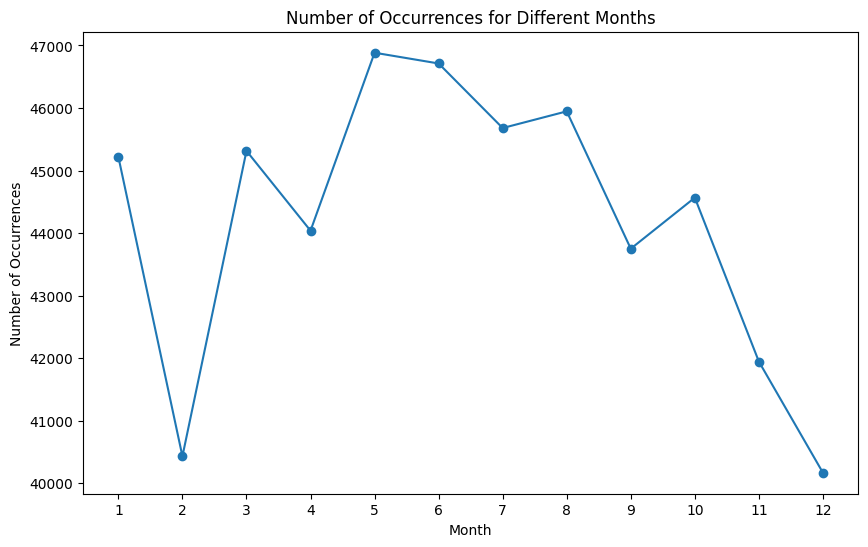

In [ ]:
# Plot the crime occurrences
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line chart
month_crime_counts.plot(kind='line', marker='o')

plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('Number of Occurrences for Different Months')  # Set the title
plt.xticks(range(1, 13, 1))  # Start at 1, increment by 1

plt.show()  # Show the plot

There are around 15% fluctuation among crime during different months of the year. But the pattern is that the rate of crime increases towards summer, and then starts decreasing.

### Days of week

Now, let's see the pattern of the crime in the days of the week as it has more information like weekend and weekdays than the raw day of the month. To do that, first I have to extract the days of the week based on year, month, and day.

In [ ]:
from datetime import datetime

# convert the year, month, and day to the date format
crime_df['date'] = pd.to_datetime(crime_df[['YEAR', 'MONTH', 'DAY']])

# Extract the day of the week from the 'date' column
crime_df['day_of_week'] = crime_df['date'].dt.day_name()

# Print the updated DataFrame
print(crime_df[['YEAR', 'MONTH', 'DAY', 'day_of_week']])

        YEAR  MONTH  DAY day_of_week
0       2003      5   12      Monday
1       2003      5    7   Wednesday
2       2003      4   23   Wednesday
3       2003      4   20      Sunday
4       2003      4   12    Saturday
...      ...    ...  ...         ...
530647  2017      3    3      Friday
530648  2017      5   29      Monday
530649  2017      4   13    Thursday
530650  2017      6    5      Monday
530651  2017      6    6     Tuesday

[530652 rows x 4 columns]


In [ ]:
# number of occurrences of crime for each month
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

days_crime_counts = crime_df['day_of_week'].value_counts().loc[custom_order]
days_crime_counts

Monday       74484
Tuesday      73208
Wednesday    72182
Thursday     72878
Friday       80954
Saturday     81898
Sunday       75048
Name: day_of_week, dtype: int64

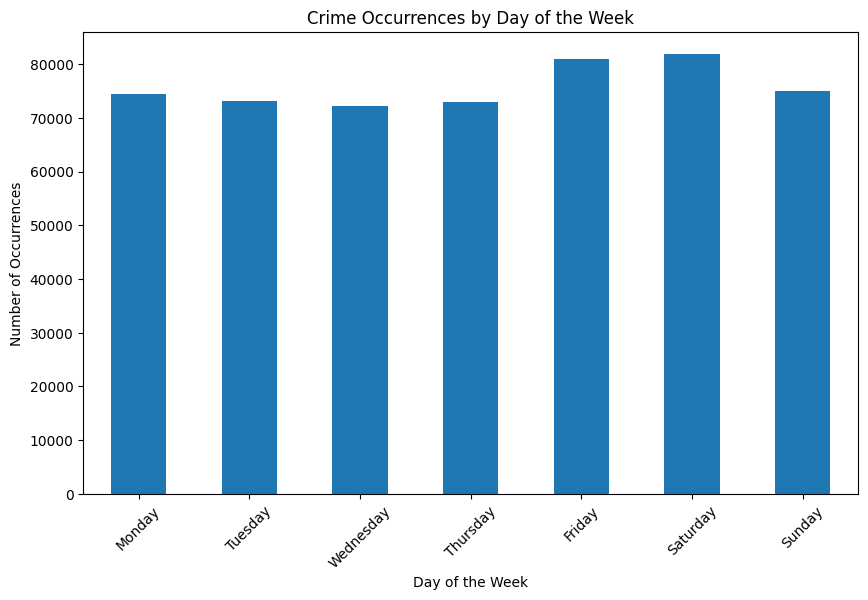

In [ ]:
# Plot the crime occurrences
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the bar chart
days_crime_counts.plot(kind='bar')  # Plot the bar chart

plt.xlabel('Day of the Week')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('Crime Occurrences by Day of the Week')  # Set the title

plt.xticks(range(len(days_crime_counts)), days_crime_counts.index, rotation=45)  # Set x-axis ticks and labels

plt.show()  # Show the plot

I personally expected more increase in crime during the weekend (Friday-Sunday), but as it can be seen, the crime rate is distributed almost uniform during the week.

### Hour

In [ ]:
# number of occurrences of crime for each hour

hour_crime_counts = crime_df['HOUR'].value_counts().sort_index()
hour_crime_counts

0.0     27177
1.0     12721
2.0     10337
3.0      8757
4.0      7912
5.0      7462
6.0      8101
7.0     10802
8.0     15934
9.0     16476
10.0    15991
11.0    16055
12.0    23613
13.0    18523
14.0    20794
15.0    23896
16.0    26085
17.0    31621
18.0    36195
19.0    29590
20.0    27707
21.0    27361
22.0    28791
23.0    24389
Name: HOUR, dtype: int64

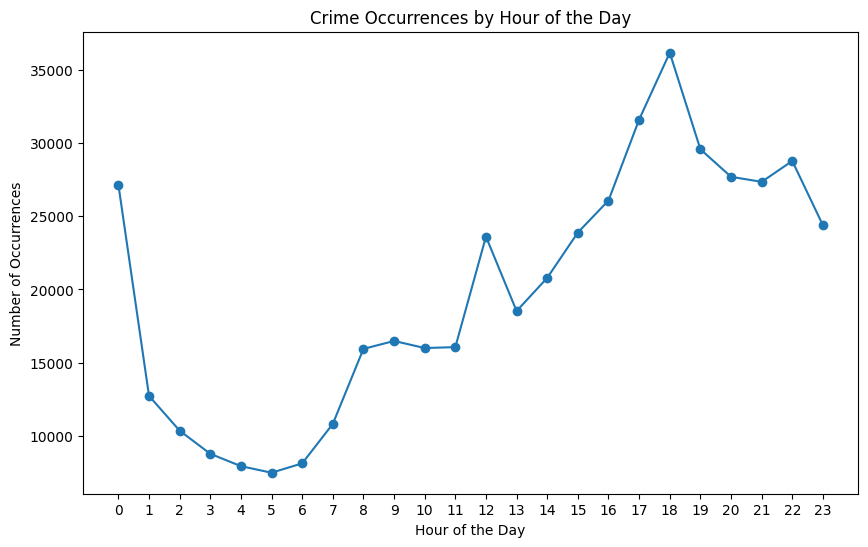

In [ ]:
# Plot the crime occurrences
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line chart
hour_crime_counts.plot(kind='line', marker='o')  # Plot the line chart with markers

plt.xlabel('Hour of the Day')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('Crime Occurrences by Hour of the Day')  # Set the title

plt.xticks(range(24))  # Set the x-axis ticks for all 24 hours

plt.show()  # Show the plot

As expected, the crime rate increase as it gets darker!

### Neighbourhood

In [ ]:
# number of occurrences of crime for each neighbourhood

neighbour_crime_counts = crime_df['NEIGHBOURHOOD'].value_counts()
neighbour_crime_counts

Central Business District    110947
West End                      41352
Fairview                      32161
Mount Pleasant                30536
Grandview-Woodland            27180
Renfrew-Collingwood           26761
Kitsilano                     26699
Kensington-Cedar Cottage      24941
Strathcona                    20919
Hastings-Sunrise              18126
Sunset                        17396
Marpole                       13083
Riley Park                    12521
Victoria-Fraserview           10819
Killarney                     10475
Oakridge                       8037
Dunbar-Southlands              7746
Kerrisdale                     7447
Arbutus Ridge                  6066
West Point Grey                5871
Shaughnessy                    5426
South Cambie                   5212
Stanley Park                   3775
Musqueam                        532
Name: NEIGHBOURHOOD, dtype: int64

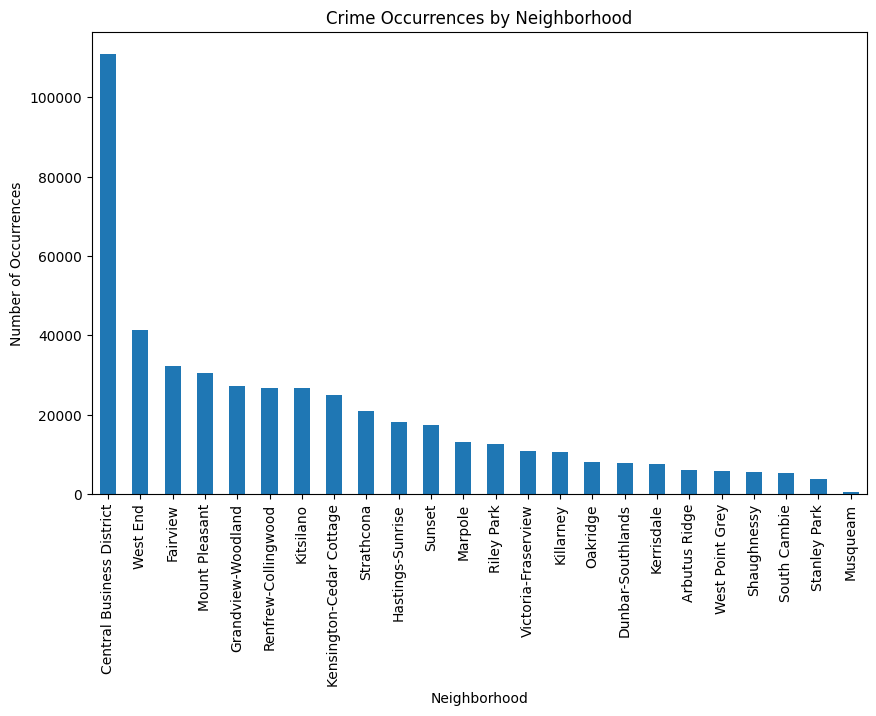

In [ ]:
# Plot the crime rates
plt.figure(figsize=(10, 6))  # Set the figure size

neighbour_crime_counts.plot(kind='bar')  # Plot the bar chart

plt.xlabel('Neighborhood')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('Crime Occurrences by Neighborhood')  # Set the title

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()  # Show the plot

Now let's see which crime type is dominant in which location

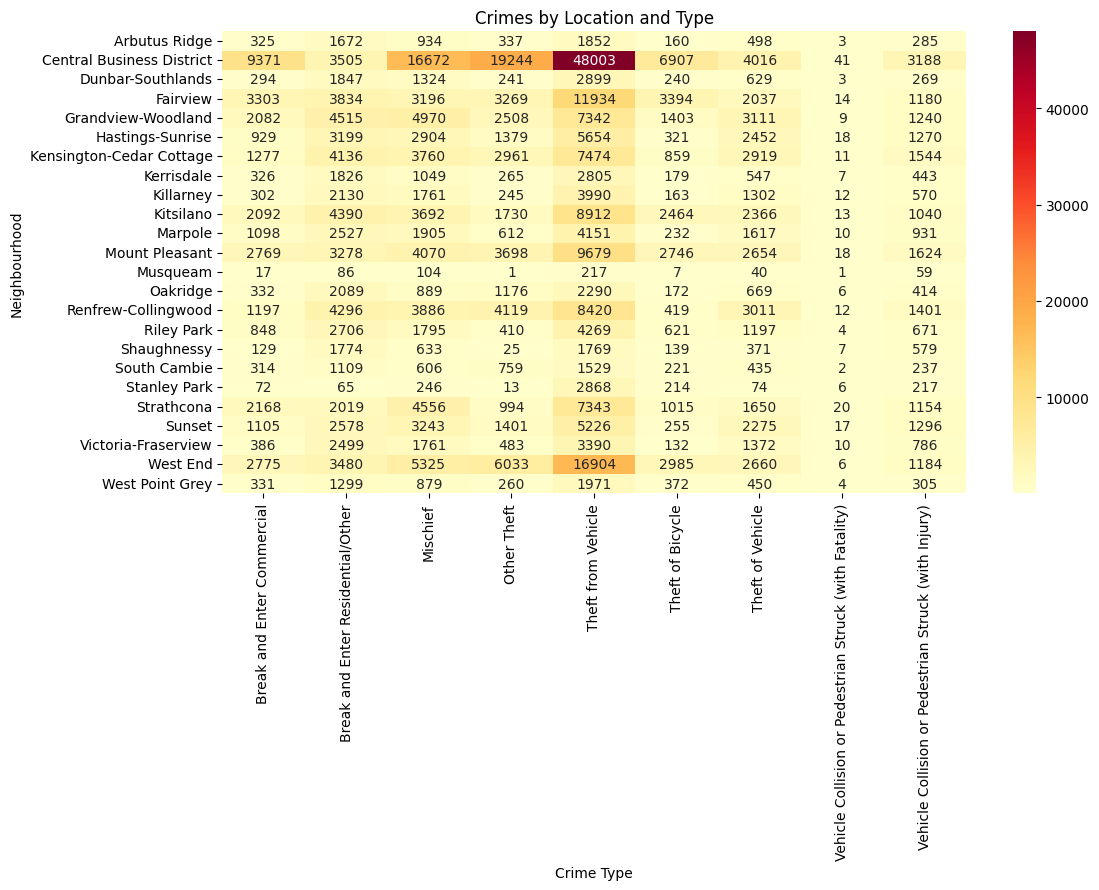

In [ ]:
import seaborn as sns

# Group the data by location and type and count the occurrences
crime_counts = crime_df.groupby(['NEIGHBOURHOOD', 'TYPE']).size().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(crime_counts, cmap='YlOrRd', annot=True, fmt='g')

plt.xlabel('Crime Type')  # Set the x-axis label
plt.ylabel('Neighbourhood')  # Set the y-axis label
plt.title('Crimes by Location and Type')  # Set the title

plt.show()  # Show the plot

# Data Pre-processing

In [ ]:
crime_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,Latitude,Longitude,date,day_of_week
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-05-12,Monday
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-05-07,Wednesday
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-04-23,Wednesday
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-04-20,Sunday
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-04-12,Saturday


To be more consistent, first let's convert the column headers all to lower case.

In [ ]:
# Convert column headers to lowercase

crime_df.columns = crime_df.columns.str.lower()
crime_df.head()

,type,year,month,day,hour,minute,hundred_block,neighbourhood,latitude,longitude,date,day_of_week
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-05-12,Monday
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-05-07,Wednesday
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-04-23,Wednesday
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-04-20,Sunday
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,2003-04-12,Saturday


### Drop redundant rows and columns

We saw that the process of data collection terminated abruptly in July 2017. So let's drop all values for that month as it may mislead the predictions for the future crime rates.

In [ ]:
# Drop rows where 'year' is 2017 and 'month' is July

# Define the filter condition
filter = (crime_df['year'] == 2017) & (crime_df['month'] == 7)

# Drop rows based on the filter condition
crime_df.drop(crime_df.loc[filter].index, inplace=True)

In [ ]:
crime_df.shape

(529403, 12)

Now lets drop the 'date' column as it is hard to handle during training, as well as the 'minute' as it does not have too much to contribute

In [ ]:
# drop redundant columns

crime_df.drop(['date', 'minute'], axis=1, inplace=True)
crime_df.head()

,type,year,month,day,hour,hundred_block,neighbourhood,latitude,longitude,day_of_week
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Monday
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Sunday
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Saturday


By investigating the dataset, I have noticed the the location info with regards to the "Offence Against a Person" crime are missing due to privacy issues.

As there is no geographical info about that crime, it is not a good idea to include that crime in the dataset. So let's drom all examples where the crime type is "Offence Against a Person".

Due to the EDA, it is going to decrease the number of examples around 54000, which is around 10% of the dataset!

In [ ]:
# Drop rows where 'type' is equal to "Offence Against a Person"

crime_df = crime_df[crime_df['type'] != 'Offence Against a Person']

In [ ]:
crime_df.shape

(475368, 10)

### Handling NaN values

In [ ]:
# count the number of NaN values in each column

nan_count = crime_df.isna().sum()
nan_count

type                0
year                0
month               0
day                 0
hour              219
hundred_block      13
neighbourhood    2480
latitude            0
longitude           0
day_of_week         0
dtype: int64

One option to handle these NaN values is to simply drop them, but we already dropped around 10% of the dataset. So let's try another option which is imputating the missing values.

To begin with, let's substitute the missing values in the 'hour' and 'minute' columns with the mean of those columns.

In [ ]:
# fill NaN values in the 'hour' column

hour_mean = crime_df['hour'].mean()   # find the mean of the 'hour' column
# minute_mean = crime_df['minute'].mean()   # find the mean of the 'minute' column

crime_df['hour'].fillna(hour_mean, inplace=True)
# crime_df['minute'].fillna(hour_mean, inplace=True)

In [ ]:
# count the number of NaN values in each column

nan_count = crime_df.isna().sum()
nan_count

type                0
year                0
month               0
day                 0
hour                0
hundred_block      13
neighbourhood    2480
latitude            0
longitude           0
day_of_week         0
dtype: int64

In [ ]:
# Create a new column with a full inclusive date
# crime_df['date'] = crime_df['date'] + pd.to_timedelta(crime_df['hour'], unit='h') + pd.to_timedelta(crime_df['minute'], unit='m')

# drop 'hour' and 'minute' columns
# crime_df.drop(['hour', 'minute'], axis=1, inplace=True)
# crime_df.head()

Now, let's use the information from 'latitude' and 'longitude' columns to fill in missing values in 'hundred_block' and 'neighbourhood' clolumns.

To do that, I first utilized KNN to use info from 'latitude' and 'longitude' columns to fill in missing values in the missing values in 'hundred_block', and then use all that info to fill in missing values in the 'neighbourhood' column.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# identify rows with missing 'hundred_block' values
missing_hundred_block = crime_df[crime_df['hundred_block'].isnull()]

# split the dataset into training set and test set
train_set = crime_df.dropna(subset=['hundred_block'])
X_train = train_set[['latitude', 'longitude']]
y_train = train_set['hundred_block']
X_test = missing_hundred_block[['latitude', 'longitude']]

# preprocess the feature matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# predict the 'hundred_block' values for the test set
predicted_hundred_block = knn.predict(X_test_scaled)

# assign the predicted 'hundred_block' values to the corresponding rows in the DataFrame
crime_df.loc[crime_df['hundred_block'].isnull(), 'hundred_block'] = predicted_hundred_block

In [ ]:
# count the number of NaN values in each column

nan_count = crime_df.isna().sum()
nan_count

type                0
year                0
month               0
day                 0
hour                0
hundred_block       0
neighbourhood    2480
latitude            0
longitude           0
day_of_week         0
dtype: int64

Now that we filled in all the missing values in the 'hundred_block' column, let's use this info to fill in the missing values in the 'neighborhood' column.

In [ ]:
# identify rows with missing 'neighbourhood' values
missing_neighbourhood = crime_df[crime_df['neighbourhood'].isnull()]

# split the dataset into training set and test set
train_set = crime_df.dropna(subset=['neighbourhood'])
X_train = train_set[['latitude', 'longitude']]
y_train = train_set['neighbourhood']
X_test = missing_neighbourhood[['latitude', 'longitude']]

# preprocess the feature matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# predict the 'neighbourhood' values for the test set
predicted_neighbourhood = knn.predict(X_test_scaled)

# assign the predicted 'neighbourhood' values to the corresponding rows in the DataFrame
crime_df.loc[crime_df['neighbourhood'].isnull(), 'neighbourhood'] = predicted_neighbourhood

In [ ]:
# count the number of NaN values in each column

nan_count = crime_df.isna().sum()
nan_count

type             0
year             0
month            0
day              0
hour             0
hundred_block    0
neighbourhood    0
latitude         0
longitude        0
day_of_week      0
dtype: int64

So, we have successfully handle all the missing values without dropping any of the training examples from the dataset.

Now let's take a look to the dataframe

In [ ]:
crime_df.head(10)

,type,year,month,day,hour,hundred_block,neighbourhood,latitude,longitude,day_of_week
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Monday
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Sunday
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Saturday
5,Other Theft,2003,3,26,20.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday
6,Break and Enter Residential/Other,2003,3,10,12.0,63XX WILTSHIRE ST,Kerrisdale,49.228051,-123.146610,Monday
7,Mischief,2003,6,28,4.0,40XX W 19TH AVE,Dunbar-Southlands,49.255559,-123.193725,Saturday
8,Other Theft,2003,2,16,9.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Sunday
9,Break and Enter Residential/Other,2003,7,9,18.0,18XX E 3RD AVE,Grandview-Woodland,49.267734,-123.067654,Wednesday


In [ ]:
crime_df.shape

(475368, 10)

In [ ]:
# create a copy of the dataframe for further use
crime_df2 = crime_df.copy()

--------------------------------------------------------------

# First Approach

Here, I will try to see if it is feasible to predict the type of crime based on time and geographical info.

To begin, let's consider the type of crime as the target variable.

In [ ]:
# unique crime_types

crime_df['type'].unique()

array(['Other Theft', 'Break and Enter Residential/Other', 'Mischief',
       'Break and Enter Commercial', 'Theft from Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Theft of Vehicle', 'Homicide', 'Theft of Bicycle'], dtype=object)

In [ ]:
# convert crime types to integers (labels)

crime_type_dict = {
    'Break and Enter Residential/Other': 1,
    'Break and Enter Commercial': 2,
    'Mischief': 3,
    'Theft from Vehicle': 4,
    'Theft of Vehicle': 5,
    'Theft of Bicycle': 6,
    'Other Theft': 7,
    'Vehicle Collision or Pedestrian Struck (with Injury)': 8,
    'Vehicle Collision or Pedestrian Struck (with Fatality)': 9,
    'Homicide': 0
}

# define a new column to store the labels for training
crime_df['crime_label'] = crime_df['type'].map(crime_type_dict)

crime_df.head()

,type,year,month,day,hour,hundred_block,neighbourhood,latitude,longitude,day_of_week,crime_label
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Monday,7
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday,7
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday,7
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Sunday,7
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Saturday,7


In [ ]:
# drop the crime type column
crime_df.drop('type', axis=1, inplace=True)
crime_df.head()

,year,month,day,hour,hundred_block,neighbourhood,latitude,longitude,day_of_week,crime_label
0,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Monday,7
1,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday,7
2,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday,7
3,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Sunday,7
4,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Saturday,7


In [ ]:
unique_neighbors = len(crime_df['neighbourhood'].unique()) # unique number of neighbors
unique_blocks = len(crime_df['hundred_block'].unique()) # unique number of blocks

print('There are {} unique number of neighbors'.format(unique_neighbors))
print('There are {} unique number of blocks'.format(unique_blocks))

There are 24 unique number of neighbors
There are 21191 unique number of blocks


In [ ]:
# Count the occurrences of each combination of categorical values
counts = data.groupby(['feature1', 'hundred_block']).size().reset_index(name='count')

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x=counts['neighbourhood'], height=counts['count'], align='center')

plt.xlabel('neighbourhood 1')
plt.ylabel('Count')
plt.title('Categorical Features Relationship')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

AttributeError: ignored

As it can be seen, the unique number of blocks is huge and encoding this column using one-hot encoding will result in a huge data set that not only is computationally expensive, but also is prone to overfitting.

So, as we have the neighbor information, lets drop the '100_block', 'latitude', and 'longitude' columns. And also encode the neighbor column using one-hot encoding.

In [ ]:
crime_df.drop(['hundred_block', 'latitude', 'longitude'], axis=1, inplace=True)
crime_df.head()

,year,month,day,hour,neighbourhood,day_of_week,crime_label
0,2003,5,12,16.0,Strathcona,Monday,7
1,2003,5,7,15.0,Strathcona,Wednesday,7
2,2003,4,23,16.0,Strathcona,Wednesday,7
3,2003,4,20,11.0,Strathcona,Sunday,7
4,2003,4,12,17.0,Strathcona,Saturday,7


In [ ]:
# convert weekdays to integers

week_day_dict = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

crime_df['day_of_week'] = crime_df['day_of_week'].map(week_day_dict)
crime_df.head()

,year,month,day,hour,neighbourhood,day_of_week,crime_label
0,2003,5,12,16.0,Strathcona,0,7
1,2003,5,7,15.0,Strathcona,2,7
2,2003,4,23,16.0,Strathcona,2,7
3,2003,4,20,11.0,Strathcona,6,7
4,2003,4,12,17.0,Strathcona,5,7


### One-hot Encoding

In [ ]:
# convert categorical values to dummy features

one_hot_encoded_neighbor = pd.get_dummies(crime_df['neighbourhood'], prefix='neighbor')

crime_df_encoded = pd.concat([crime_df, one_hot_encoded_neighbor], axis=1)

# drop categorical columns
crime_df_encoded.drop(['neighbourhood'], axis=1, inplace=True)

crime_df_encoded.head()

,year,month,day,hour,day_of_week,crime_label,neighbor_Arbutus Ridge,neighbor_Central Business District,neighbor_Dunbar-Southlands,neighbor_Fairview,...,neighbor_Renfrew-Collingwood,neighbor_Riley Park,neighbor_Shaughnessy,neighbor_South Cambie,neighbor_Stanley Park,neighbor_Strathcona,neighbor_Sunset,neighbor_Victoria-Fraserview,neighbor_West End,neighbor_West Point Grey
0,2003,5,12,16.0,0,7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2003,5,7,15.0,2,7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2003,4,23,16.0,2,7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2003,4,20,11.0,6,7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2003,4,12,17.0,5,7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Train Test Split

lets consider the data before 2017 as the training data, and the data after 2017 as a test data (excluding the data in July 2017)

In [ ]:
# train test split
train_df = crime_df_encoded[crime_df_encoded['year'] < 2017]
test_df = crime_df_encoded[crime_df_encoded['year'] >= 2017]

X_train = train_df.drop(['crime_label'], axis=1)
y_train = train_df['crime_label']

X_test = test_df.drop(['crime_label'], axis=1)
y_test = test_df['crime_label']

# Random Forest

In [ ]:
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.22      0.20      0.21      1210
           2       0.25      0.18      0.21      1053
           3       0.19      0.09      0.13      2421
           4       0.40      0.59      0.48      5527
           5       0.05      0.01      0.02       696
           6       0.12      0.09      0.11       853
           7       0.32      0.33      0.33      2694
           8       0.08      0.04      0.05       641
           9       0.00      0.00      0.00         5

    accuracy                           0.33     15110
   macro avg       0.26      0.25      0.25     15110
weighted avg       0.28      0.33      0.29     15110



# XG Boost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.31      0.18      0.22      1210
           2       0.34      0.21      0.26      1053
           3       0.30      0.01      0.02      2421
           4       0.41      0.80      0.54      5527
           5       0.00      0.00      0.00       696
           6       0.25      0.03      0.06       853
           7       0.38      0.39      0.38      2694
           8       0.18      0.00      0.01       641
           9       0.00      0.00      0.00         5

    accuracy                           0.40     15110
   macro avg       0.32      0.26      0.25     15110
weighted avg       0.34      0.40      0.31     15110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Well, the accuracy of the model is too low!!! That is, it is hard to predict the type of crime based on time and neighborhood.


In [ ]:
crime_df3 = crime_df2.copy()

-----------------------------------------------------

# Second Approach


Now lets see if we can predict the number of crimes within each month for each neighborhood.

In [ ]:
crime_df3.head()

,type,year,month,day,hour,hundred_block,neighbourhood,latitude,longitude,day_of_week
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Monday
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Wednesday
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Sunday
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,Saturday


Let's keep the crime type, neighborhood, year, month, and day of week and drop the rest

In [ ]:
# drop redundant columns

crime_df3.drop(['day', 'hour', 'hundred_block', 'latitude', 'longitude', 'day_of_week'], axis=1, inplace=True)
crime_df3.head()

,type,year,month,neighbourhood
0,Other Theft,2003,5,Strathcona
1,Other Theft,2003,5,Strathcona
2,Other Theft,2003,4,Strathcona
3,Other Theft,2003,4,Strathcona
4,Other Theft,2003,4,Strathcona


In [ ]:
# group the dataframe by year, month, and location

crime_df3['count'] = crime_df3.groupby(['year', 'month', 'neighbourhood'])['year'].transform('count')
crime_df3

,type,year,month,neighbourhood,count
0,Other Theft,2003,5,Strathcona,169
1,Other Theft,2003,5,Strathcona,169
2,Other Theft,2003,4,Strathcona,149
3,Other Theft,2003,4,Strathcona,149
4,Other Theft,2003,4,Strathcona,149
...,...,...,...,...,...
530646,Mischief,2017,1,Grandview-Woodland,112
530647,Break and Enter Residential/Other,2017,3,Hastings-Sunrise,127
530648,Mischief,2017,5,Grandview-Woodland,142
530650,Theft from Vehicle,2017,6,Central Business District,786


In [ ]:
# drop duplicate columns

crime_df3 = crime_df3.drop_duplicates(subset=['year', 'month', 'neighbourhood'], keep='first')
crime_df3

,type,year,month,neighbourhood,count
0,Other Theft,2003,5,Strathcona,169
2,Other Theft,2003,4,Strathcona,149
5,Other Theft,2003,3,Strathcona,137
6,Break and Enter Residential/Other,2003,3,Kerrisdale,48
7,Mischief,2003,6,Dunbar-Southlands,81
...,...,...,...,...,...
514745,Vehicle Collision or Pedestrian Struck (with I...,2017,1,South Cambie,18
515034,Break and Enter Residential/Other,2017,6,South Cambie,31
518200,Theft of Vehicle,2017,3,Musqueam,2
520163,Mischief,2017,2,Stanley Park,4


In [ ]:
# drop the crime type column

crime_df3.drop(['type'], axis=1, inplace=True)
crime_df3.head()

<ipython-input-81-5c1383bd1d29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df3.drop(['type'], axis=1, inplace=True)


,year,month,neighbourhood,count
0,2003,5,Strathcona,169
2,2003,4,Strathcona,149
5,2003,3,Strathcona,137
6,2003,3,Kerrisdale,48
7,2003,6,Dunbar-Southlands,81


In [ ]:
# one-hot encoding

one_hot_encoded_neighbor = pd.get_dummies(crime_df3['neighbourhood'], prefix='neighbor')

crime_df_encoded = pd.concat([crime_df3, one_hot_encoded_neighbor], axis=1)

# drop categorical columns
crime_df_encoded.drop(['neighbourhood'], axis=1, inplace=True)

crime_df_encoded.head()

,year,month,count,neighbor_Arbutus Ridge,neighbor_Central Business District,neighbor_Dunbar-Southlands,neighbor_Fairview,neighbor_Grandview-Woodland,neighbor_Hastings-Sunrise,neighbor_Kensington-Cedar Cottage,...,neighbor_Renfrew-Collingwood,neighbor_Riley Park,neighbor_Shaughnessy,neighbor_South Cambie,neighbor_Stanley Park,neighbor_Strathcona,neighbor_Sunset,neighbor_Victoria-Fraserview,neighbor_West End,neighbor_West Point Grey
0,2003,5,169,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2003,4,149,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2003,3,137,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,2003,3,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2003,6,81,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's take the same procedure as before for train test split, and training the model

In [ ]:
# train test split
train_df = crime_df_encoded[crime_df_encoded['year'] < 2017]
test_df = crime_df_encoded[crime_df_encoded['year'] >= 2017]

X_train = train_df.drop(['count'], axis=1)
y_train = train_df['count']

X_test = test_df.drop(['count'], axis=1)
y_test = test_df['count']

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create the model
rf_model = RandomForestRegressor()

# train the model
rf_model.fit(X_train, y_train)

# make predictions
y_pred = rf_model.predict(X_test)

# evaluate the model
print(rf_model.score(X_test, y_test))

0.9458636347000934


### XG Boost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# create the model
xgb_model = xgb.XGBRegressor()

# train the model
xgb_model.fit(X_train, y_train)

# make predictions
y_pred = xgb_model.predict(X_test)

# evaluate the model
print(xgb_model.score(X_test, y_test))

0.9426569053199066


Let's plot the predicted values against the expected values

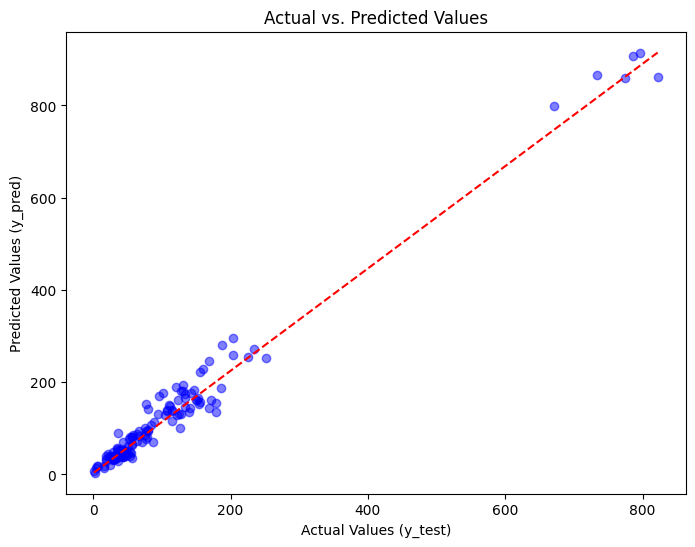

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Scatter plot with swapped axes
plt.scatter(y_test, y_pred, color='b', alpha=0.5)

plt.xlabel('Actual Values (y_test)')  # Set the x-axis label
plt.ylabel('Predicted Values (y_pred)')  # Set the y-axis label
plt.title('Actual vs. Predicted Values')  # Set the title

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='r', linestyle='--')  # Add a diagonal line representing perfect predictions

plt.show()  # Show the plot

Amazing!!!

So we can predict the number of crimes in the future with high accuracy.

To do that, first I will append the data from 2017 back to the train set. Then I will generate new data for each month from 07/2017 till 12/2023 for all neighbors.

In [ ]:
# train set
train_df = crime_df3

# test set
from itertools import product

start_date = '2017-07-01'
end_date = '2017-12-31'
neighbors = list(crime_df3['neighbourhood'].unique())

date_range = pd.date_range(start=start_date, end=end_date, freq='M')
year_month_combinations = list(product(date_range.year.unique(), date_range.month.unique()))

data = {'year': [], 'month': [], 'neighbourhood': []}

for year, month in year_month_combinations:
    for neighbor in neighbors:
        data['year'].append(year)
        data['month'].append(month)
        data['neighbourhood'].append(neighbor)

test_df = pd.DataFrame(data)

# Remove any duplicate rows
test_df = test_df.drop_duplicates()
# Filter the test set to exclude combinations before the start date
test_df = test_df[(test_df['year'] > int(start_date[:4])) | ((test_df['year'] == int(start_date[:4])) & (test_df['month'] >= int(start_date[5:7])))]

# Filter the test set to exclude combinations after the end date
test_df = test_df[(test_df['year'] < int(end_date[:4])) | ((test_df['year'] == int(end_date[:4])) & (test_df['month'] <= int(end_date[5:7])))]

# test_df

In [ ]:
# one-hot encoding

one_hot_encoded_train = pd.get_dummies(train_df['neighbourhood'], prefix='neighbor')
one_hot_encoded_test = pd.get_dummies(test_df['neighbourhood'], prefix='neighbor')

train_df_encoded = pd.concat([train_df, one_hot_encoded_train], axis=1)
test_df_encoded = pd.concat([test_df, one_hot_encoded_test], axis=1)

# drop categorical columns
train_df_encoded.drop(['neighbourhood'], axis=1, inplace=True)
test_df_encoded.drop(['neighbourhood'], axis=1, inplace=True)

In [ ]:
# train test split

X_train_final = train_df_encoded.drop(['count'], axis=1)
y_train_final = train_df_encoded['count']

X_test_final = test_df_encoded

Now, let's try XG Boost to predict the future trend of crime rate from 2017 to 2023.

I should state that as there is no label for these data, we cannot evaluate the performance of the model. But we have evaluated the performance of such models on 2017 data and the performance was satisfying (more than 94%). So we expect a reasonable outcome here too.

In [ ]:
#import xgboost as xgb
from sklearn.metrics import mean_squared_error

# create the model
xgb_model = xgb.XGBRegressor()

# train the model
xgb_model.fit(X_train_final, y_train_final)

# make predictions
y_pred = xgb_model.predict(X_test_final)

Now, let's concatenate the y_pred as the labels (counts) to the test data set.

In [ ]:
# convert float y_pred to intigers
y_pred = [int(x) for x in y_pred]

# add y_pred as the crime count values to the end of test set
test_df['count'] = y_pred
test_df.head()

,year,month,neighbourhood,count
0,2017,7,Strathcona,139
1,2017,7,Kerrisdale,39
2,2017,7,Dunbar-Southlands,40
3,2017,7,Grandview-Woodland,147
4,2017,7,Sunset,70


In [ ]:
# stack the train and test sets vertically

crime_df_final = pd.concat([train_df, test_df], axis=0)
crime_df_final.head()

,year,month,neighbourhood,count
0,2003,5,Strathcona,169
2,2003,4,Strathcona,149
5,2003,3,Strathcona,137
6,2003,3,Kerrisdale,48
7,2003,6,Dunbar-Southlands,81


In [ ]:
crime_df_final.shape

(4299, 4)

Now, let's do some visualization based on this dataframe!

let's plot the pattern of crime in 2017 from the original data set, and what we trained here

In [ ]:
crime_counts_raw = crime_2017['MONTH'].value_counts().sort_index() # previously defined!!!
crime_counts_raw

1    2469
2    2381
3    2999
4    2861
5    3007
6    2891
7    1249
Name: MONTH, dtype: int64

In [ ]:
crime_2017_full = crime_df_final[crime_df_final['year'] == 2017]
crime_counts_pred = crime_2017_full.groupby('month')['count'].sum()
crime_counts_pred

month
1     2209
2     2143
3     2766
4     2592
5     2735
6     2665
7     2845
8     2739
9     2609
10    2646
11    2509
12    2161
Name: count, dtype: int64

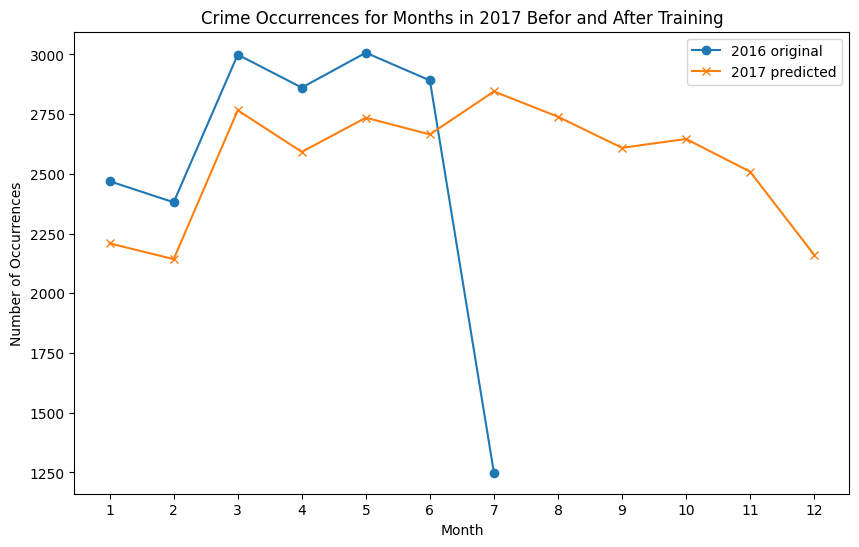

In [ ]:
# Plot the crime occurrences
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line chart for 2017 raw
plt.plot(crime_counts_raw.index, crime_counts_raw, label='2016 original', marker='o')

# Plot the line chart for 2017 predicted
plt.plot(crime_counts_pred.index, crime_counts_pred, label='2017 predicted', marker='x')

plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('Crime Occurrences for Months in 2017 Befor and After Training')  # Set the title

plt.xticks(range(1, 13))  # Set the x-axis ticks for all months

plt.legend()  # Show the legend

plt.show()  # Show the plot

In [ ]:
total_crime_by_year = crime_df_final.groupby('year')['count'].sum()
total_crime_by_year

year
2003    46421
2004    45475
2005    40893
2006    37972
2007    33280
2008    31188
2009    28287
2010    25957
2011    24703
2012    25436
2013    25393
2014    29501
2015    31126
2016    34626
2017    30619
Name: count, dtype: int64

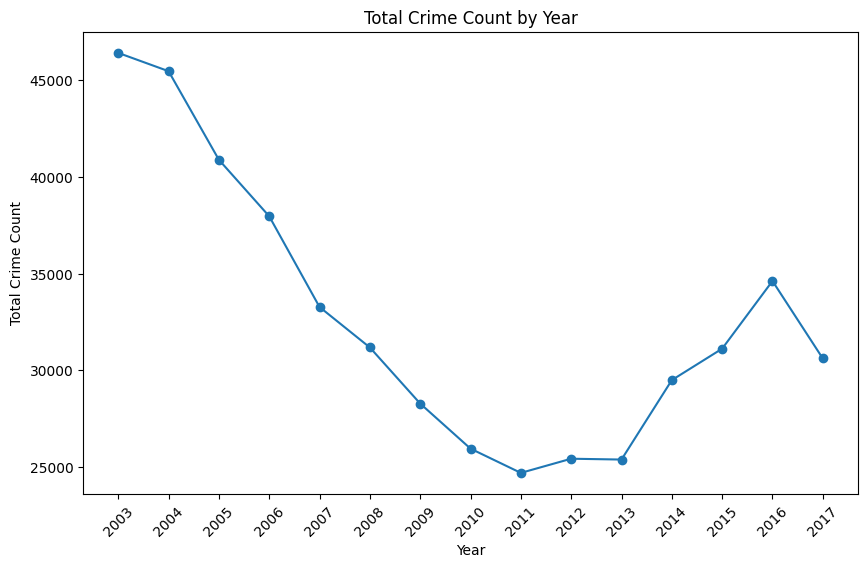

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(total_crime_by_year.index, total_crime_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Count by Year')

#Set integer labels on the x-axis
plt.xticks(total_crime_by_year.index.astype(int), rotation=45)

plt.show()

The pattern makes sense because as we visualize the crime pattern in 2016 and 2017 (first half), we observed that the rate of crime is lower in 2017 than 2016. Here that generalises for the whole 2017. That's why there is a decrease in the cumber of crimes.

Now, let's try to predict the crime up to 2023

The procedure is exactly the same as before

In [ ]:
# train set
train_df = crime_df3

# test set
from itertools import product

start_date = '2017-07-01'
end_date = '2023-12-31'
neighbors = list(crime_df3['neighbourhood'].unique())

date_range = pd.date_range(start=start_date, end=end_date, freq='M')
year_month_combinations = list(product(date_range.year.unique(), date_range.month.unique()))

data = {'year': [], 'month': [], 'neighbourhood': []}

for year, month in year_month_combinations:
    for neighbor in neighbors:
        data['year'].append(year)
        data['month'].append(month)
        data['neighbourhood'].append(neighbor)

test_df = pd.DataFrame(data)

# Remove any duplicate rows
test_df = test_df.drop_duplicates()
# Filter the test set to exclude combinations before the start date
test_df = test_df[(test_df['year'] > int(start_date[:4])) | ((test_df['year'] == int(start_date[:4])) & (test_df['month'] >= int(start_date[5:7])))]

# Filter the test set to exclude combinations after the end date
test_df = test_df[(test_df['year'] < int(end_date[:4])) | ((test_df['year'] == int(end_date[:4])) & (test_df['month'] <= int(end_date[5:7])))]

In [ ]:
# one-hot encoding

one_hot_encoded_train = pd.get_dummies(train_df['neighbourhood'], prefix='neighbor')
one_hot_encoded_test = pd.get_dummies(test_df['neighbourhood'], prefix='neighbor')

train_df_encoded = pd.concat([train_df, one_hot_encoded_train], axis=1)
test_df_encoded = pd.concat([test_df, one_hot_encoded_test], axis=1)

# drop categorical columns
train_df_encoded.drop(['neighbourhood'], axis=1, inplace=True)
test_df_encoded.drop(['neighbourhood'], axis=1, inplace=True)

In [ ]:
# train test split

X_train_final = train_df_encoded.drop(['count'], axis=1)
y_train_final = train_df_encoded['count']

X_test_final = test_df_encoded

In [ ]:
#import xgboost as xgb
from sklearn.metrics import mean_squared_error

# create the model
xgb_model = xgb.XGBRegressor()

# train the model
xgb_model.fit(X_train_final, y_train_final)

# make predictions
y_pred = xgb_model.predict(X_test_final)

In [ ]:
# convert float y_pred to intigers
y_pred = [int(x) for x in y_pred]

# add y_pred as the crime count values to the end of test set
test_df['count'] = y_pred
test_df.head()

,year,month,neighbourhood,count
0,2017,7,Strathcona,139
1,2017,7,Kerrisdale,39
2,2017,7,Dunbar-Southlands,40
3,2017,7,Grandview-Woodland,147
4,2017,7,Sunset,70


In [ ]:
# stack the train and test sets vertically

crime_df_final = pd.concat([train_df, test_df], axis=0)
crime_df_final.head()

,year,month,neighbourhood,count
0,2003,5,Strathcona,169
2,2003,4,Strathcona,149
5,2003,3,Strathcona,137
6,2003,3,Kerrisdale,48
7,2003,6,Dunbar-Southlands,81


In [ ]:
crime_df_final.shape

(6027, 4)

In [ ]:
total_crime_by_year = crime_df_final.groupby('year')['count'].sum()
total_crime_by_year

year
2003    46421
2004    45475
2005    40893
2006    37972
2007    33280
2008    31188
2009    28287
2010    25957
2011    24703
2012    25436
2013    25393
2014    29501
2015    31126
2016    34626
2017    30619
2018    30515
2019    30515
2020    30515
2021    30515
2022    30515
2023    30515
Name: count, dtype: int64

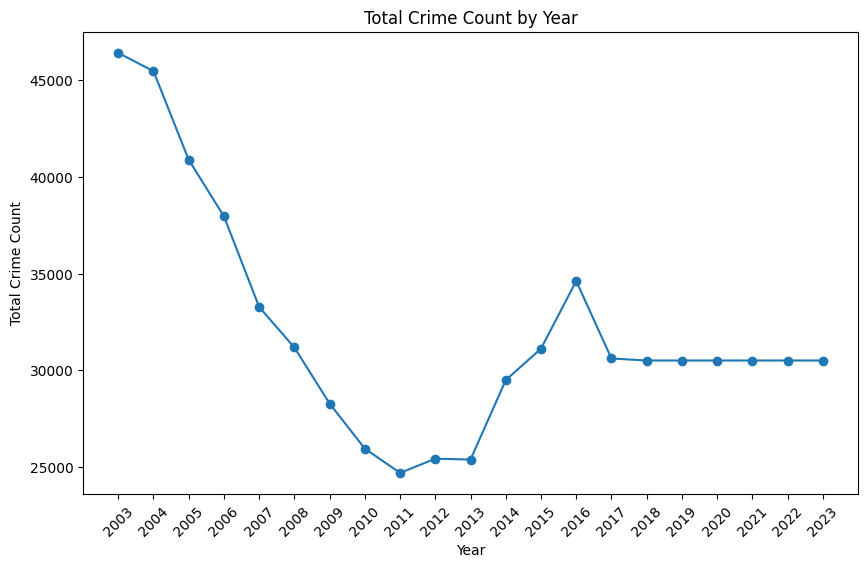

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(total_crime_by_year.index, total_crime_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Count by Year')

#Set integer labels on the x-axis
plt.xticks(total_crime_by_year.index.astype(int), rotation=45)

plt.show()

It seems that XG Boost fails to generalize the pattern to make predictions in the future.

So let's try a simpler algorithm like Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression

# create the model
lr_model = LinearRegression()

# train the model
lr_model.fit(X_train_final, y_train_final)

# make predictions
y_pred = lr_model.predict(X_test_final)

In [ ]:
# convert float y_pred to intigers
y_pred = [int(x) for x in y_pred]

# add y_pred as the crime count values to the end of test set
test_df['count'] = y_pred
test_df.head()

,year,month,neighbourhood,count
0,2017,7,Strathcona,91
1,2017,7,Kerrisdale,14
2,2017,7,Dunbar-Southlands,15
3,2017,7,Grandview-Woodland,127
4,2017,7,Sunset,71


In [ ]:
# stack the train and test sets vertically

crime_df_final = pd.concat([train_df, test_df], axis=0)
crime_df_final.head()

,year,month,neighbourhood,count
0,2003,5,Strathcona,169
2,2003,4,Strathcona,149
5,2003,3,Strathcona,137
6,2003,3,Kerrisdale,48
7,2003,6,Dunbar-Southlands,81


In [ ]:
total_crime_by_year = crime_df_final.groupby('year')['count'].sum()
total_crime_by_year

year
2003    46421
2004    45475
2005    40893
2006    37972
2007    33280
2008    31188
2009    28287
2010    25957
2011    24703
2012    25436
2013    25393
2014    29501
2015    31126
2016    34626
2017    27410
2018    23244
2019    22121
2020    20976
2021    19851
2022    18723
2023    17575
Name: count, dtype: int64

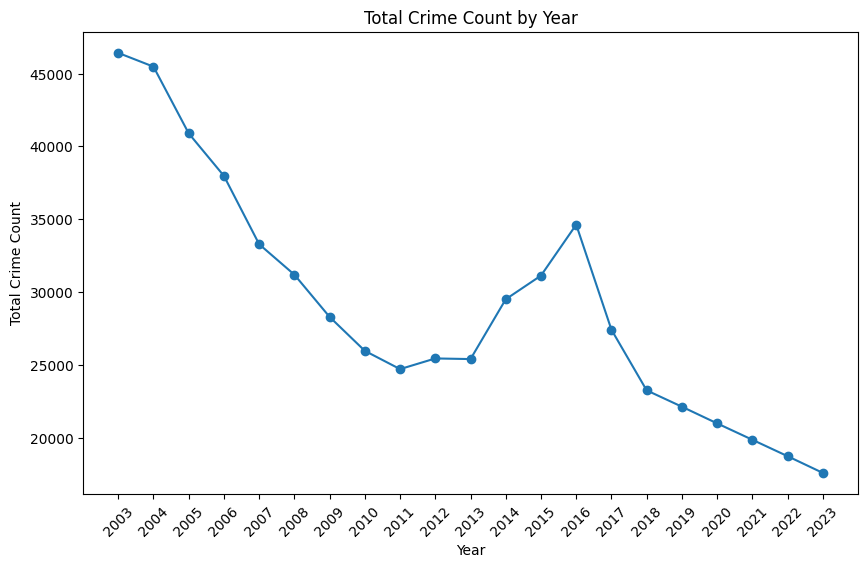

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(total_crime_by_year.index, total_crime_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Count by Year')

#Set integer labels on the x-axis
plt.xticks(total_crime_by_year.index.astype(int), rotation=45)

plt.show()

The performance of the Linear regression looks better than XG Boost, without having the ground truth, there is no way to verify the performance of neither of them!